## Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

#### Vamos trabalhar com um dataset de clusters pré-gerado

In [2]:
from sklearn.datasets import make_blobs
from sklearn import decomposition

rclusters_data, rclusters_label = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=13,
         cluster_std=2)

labels = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","C"]
rclusters_df = pd.DataFrame(np.column_stack((rclusters_data,rclusters_label)),
                           columns=labels)

In [3]:
rclusters_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,C
0,4.016794,-3.790845,8.017393,9.730584,5.077792,0.512915,2.878350,4.833294,-1.058514,6.102176,0.0
1,5.737905,-5.734353,5.458263,1.245100,-0.507280,11.518467,-9.594813,-6.674885,4.613275,-2.503647,3.0
2,6.858014,-10.391083,3.058965,0.828260,-0.750277,6.441632,-13.020148,-6.458981,2.761462,-5.135676,3.0
3,4.398365,-6.932519,5.378765,8.831973,10.976484,-1.436050,2.764130,4.731219,3.782642,4.295638,0.0
4,-7.704930,-7.174018,-10.610180,8.854839,-0.720169,3.879538,-8.106169,-4.223907,-11.422369,-4.521692,1.0


### Redução de Dimensionalidade usando PCA

In [4]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(rclusters_df)

In [5]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = rclusters_label
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,4.901210,-10.586042,6.635787,3.275336,0
1,-16.437665,-6.106828,-5.913033,2.153366,3
2,-15.407675,-4.213353,-8.694291,-2.317439,3
3,2.393089,-14.241652,9.055529,0.228664,0
4,-6.561365,16.521034,5.175002,-3.581334,1


In [6]:
pca.explained_variance_ratio_

array([0.41051704, 0.36819481, 0.14004362, 0.01924092])

#### Componentes Principais e seu poder de explicação da variância

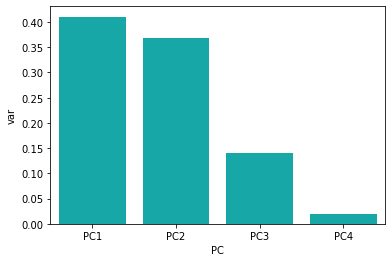

In [7]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", data=df, color="c")

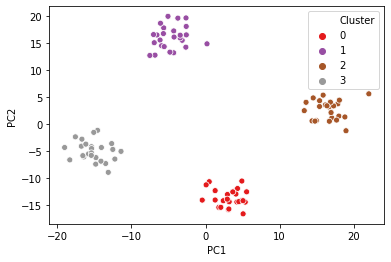

In [8]:
sns.scatterplot( x="PC1", y="PC2",
  data=pc_df, 
  palette="Set1",
  hue='Cluster')

### Agrupamento utilizando K-Means

##### Escolhendo k=2

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans_clusters = kmeans.fit(pc_df.iloc[:,0:4])

In [10]:
kmeans_clusters.cluster_centers_

array([[ 9.89496512, -5.54198321,  0.7588829 , -0.06806418],
       [-9.89496512,  5.54198321, -0.7588829 ,  0.06806418]])

In [11]:
kmeans_clusters.labels_

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [12]:
pc_df_clusters = pc_df.loc[:,"cluster_km"] = kmeans_clusters.labels_

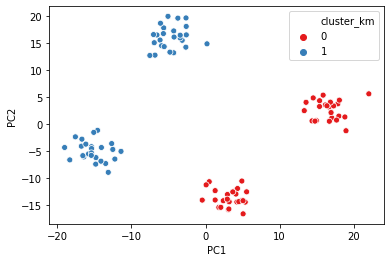

In [13]:
sns.scatterplot( x="PC1", y="PC2",
  data=pc_df, 
  palette="Set1",
  hue='cluster_km')

##### Escolhendo k=4

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans_clusters = kmeans.fit(pc_df.iloc[:,0:4])

In [15]:
kmeans_clusters.cluster_centers_

array([[-4.66983631e+00,  1.61032268e+01,  5.30005535e+00,
         1.22518260e-01],
       [ 1.65899899e+01,  2.61847656e+00, -6.26005012e+00,
        -1.07978147e-01],
       [ 3.19994029e+00, -1.37024430e+01,  7.77781593e+00,
        -2.81502061e-02],
       [-1.51200939e+01, -5.01926034e+00, -6.81782115e+00,
         1.36100934e-02]])

In [16]:
kmeans_clusters.labels_

array([2, 3, 3, 2, 0, 2, 0, 2, 2, 0, 3, 3, 0, 0, 1, 1, 3, 2, 2, 0, 0, 1,
       2, 1, 3, 1, 2, 2, 2, 3, 1, 0, 3, 1, 0, 2, 0, 3, 3, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 3, 0, 3, 1, 3, 3, 0, 3, 1, 3, 2, 2, 1, 1, 0, 1, 1, 2,
       3, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 0, 0, 1, 3, 2, 2, 2, 1, 0, 0, 2,
       1, 3, 0, 3, 0, 0, 0, 1, 3, 1, 2, 0])

In [17]:
pc_df_clusters = pc_df.loc[:,"cluster_km"] = kmeans_clusters.labels_

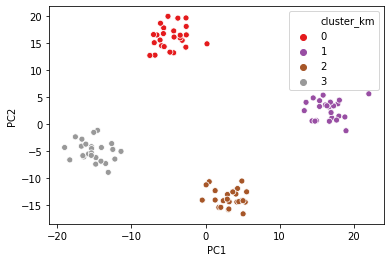

In [18]:
sns.scatterplot( x="PC1", y="PC2",
  data=pc_df, 
  palette="Set1",
  hue='cluster_km')

## Sua vez!

#### Vamos trabalhar com o Dataset de Diabetes de Índios Pima

Colunas:

* 0. Número de vezes grávidas
* 1. Concentração de glicose a 2h de um teste de tolerância a glicose.
* 2. Pressão sanguínea diastólica (mm Hg).
* 3. Mensuração da espessura da pregas cutâneas Tricipital (mm).
* 4. Nível sérico de Insulina após 2h (mu U/ml).
* 5. Body mass index (peso em kg/(altura em m)^2).
* 6. Função Pedigree Diabetes.
* 7. Idade (anos).
* 8. Variável Classe (0 ou 1).

In [3]:
dataset = pd.read_csv('../dados/pima-indians-diabetes.data.txt', header=None)

#### Faça um sumário descritivo dos dados

#### Faça a Estandardização dos dados de entrada (sem a classe)

#### Aplique o PCA aos dados de entrada (sem a classe)

#### Plote o gráfico de barras com a explicação da variância dada pelos componentes principais

#### Faça um scatterplot com os dois primeiros componentes no x e y, respectivamente, e a cor sendo a classe

#### Aplique o K-Means ao dado com os dois primeiros componentes principais com num_clusters=2

#### Faça um scatterplot com os dois primeiros componentes no x e y, respectivamente, e a cor sendo o cluster definido pelo kmeans